In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

marvel = pd.read_csv('marvel-wikia-data.csv')
dc = pd.read_csv('dc-wikia-data.csv')
dc['M_C'] = False
marvel['YEAR'] = marvel['Year']
dc['Year'] = dc['YEAR']
marvel['M_C'] = True
marvel.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year,YEAR,M_C
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0,1962.0,True
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0,1941.0,True
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0,1974.0,True
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0,1963.0,True
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0,1950.0,True


In [3]:
dc.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,M_C,Year
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0,False,1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0,False,1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0,False,1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0,False,1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0,False,1940.0


In [4]:
heroes = pd.merge(dc, marvel, how = 'outer')
heroes.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,M_C,Year
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0,False,1939.0
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0,False,1986.0
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0,False,1959.0
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0,False,1987.0
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0,False,1940.0


In [5]:
heroes = pd.merge(heroes.loc[heroes['SEX'] == 'Female Characters'], heroes.loc[heroes['SEX'] == 'Male Characters'], how = 'outer')

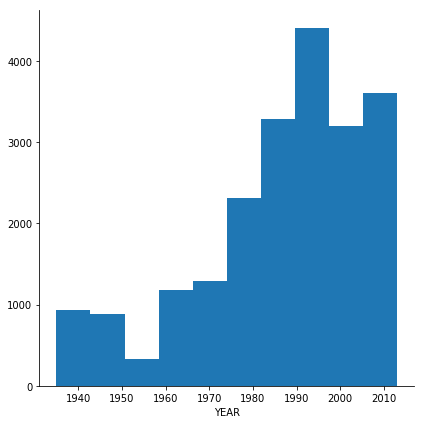

In [6]:
graph1 = sns.FacetGrid(heroes, height = 6)
graph1.map(plt.hist, 'YEAR')
plt.show()

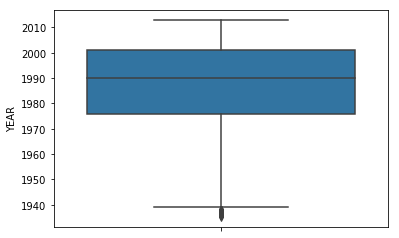

In [7]:
graph2 = sns.boxplot(y = 'YEAR', data = heroes)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


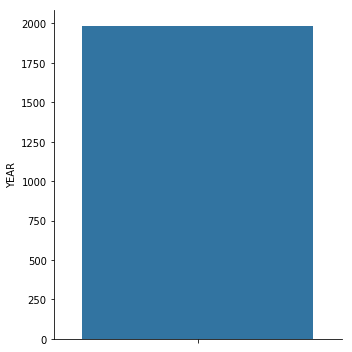

In [8]:
graph3 = sns.factorplot(y = 'YEAR', data = heroes, kind = 'bar', ci = 99)
plt.show()

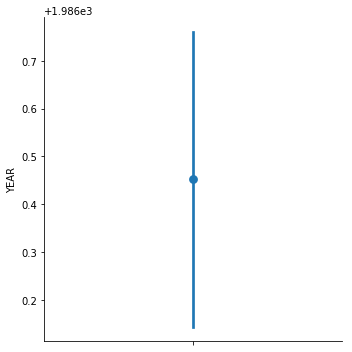

In [9]:
graph4 = sns.factorplot(y = 'YEAR', data = heroes, kind = 'point', ci = 99)
plt.show()

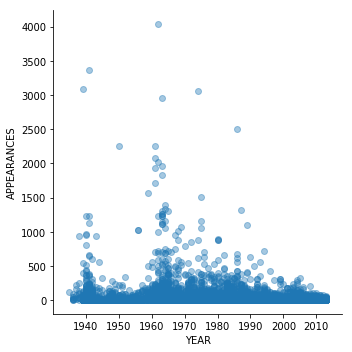

In [10]:
g5 = sns.lmplot(x = 'YEAR', y = 'APPEARANCES', scatter_kws={'alpha':0.4}, data = heroes, fit_reg = False)
plt.show()

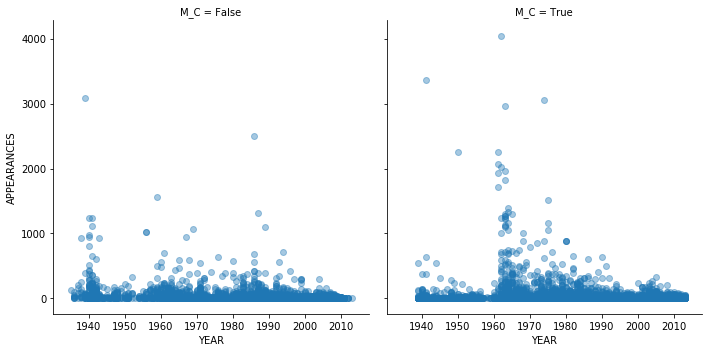

In [11]:
g6 = sns.lmplot(x = 'YEAR', y = 'APPEARANCES', scatter_kws={'alpha':0.4}, data = heroes, col = 'M_C', fit_reg = False)
plt.show()

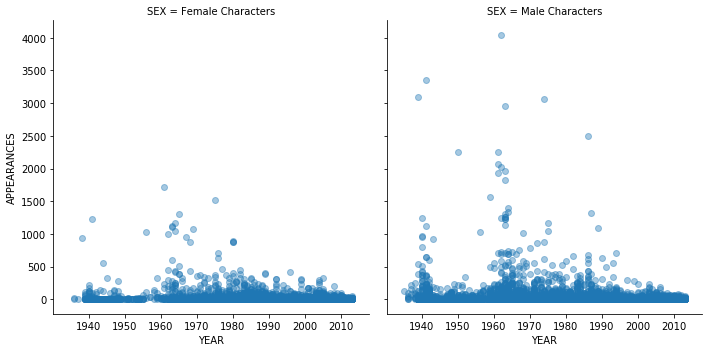

In [12]:
g7 = sns.lmplot(x = 'YEAR', y = 'APPEARANCES', scatter_kws={'alpha':0.4}, data = heroes, col = 'SEX', fit_reg = False)
plt.show()

<Figure size 1440x595.44 with 0 Axes>

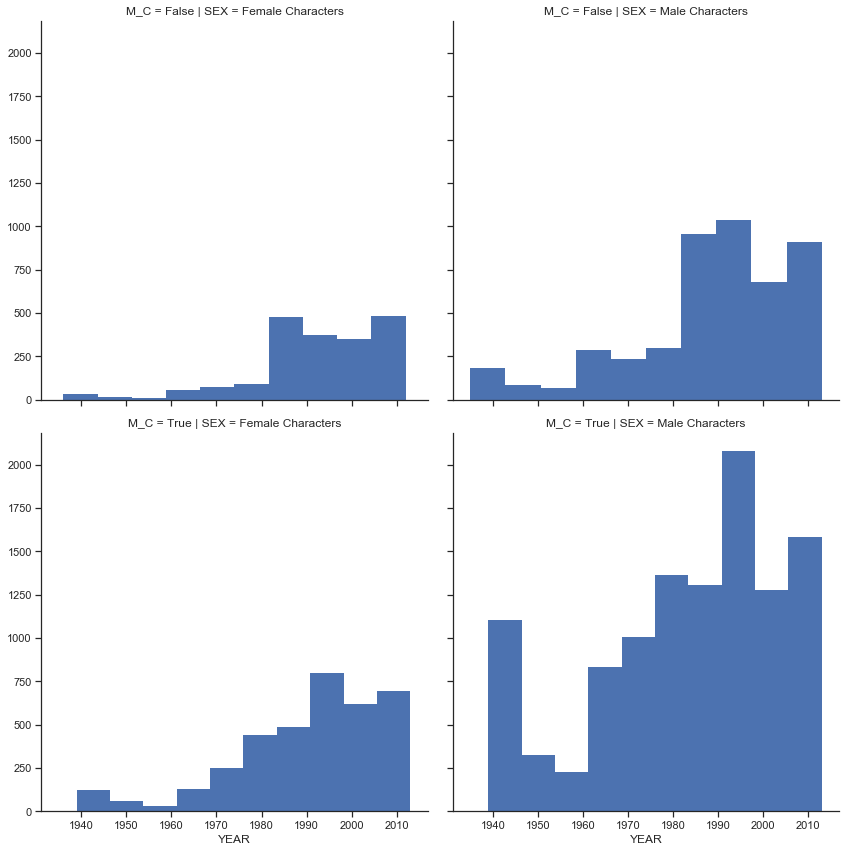

In [13]:
sns.set(style = 'ticks')
plt.gcf().set_size_inches(20, 8.27)
g1 = sns.FacetGrid(heroes, row = 'M_C', col = 'SEX', height = 6)
g1.map(plt.hist, 'YEAR', lw=0)
plt.tight_layout()
plt.show()

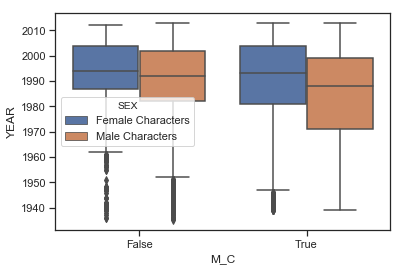

In [14]:
g2 = sns.boxplot(x = 'M_C', y = 'YEAR', hue = 'SEX', data = heroes)
plt.show()

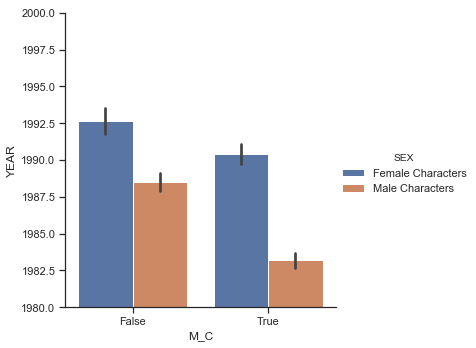

In [15]:
g3 = sns.factorplot(x = 'M_C', y = 'YEAR', hue = 'SEX', data = heroes, kind = 'bar', ci = 99)
g3.set(ylim = (1980, 2000))
plt.show()

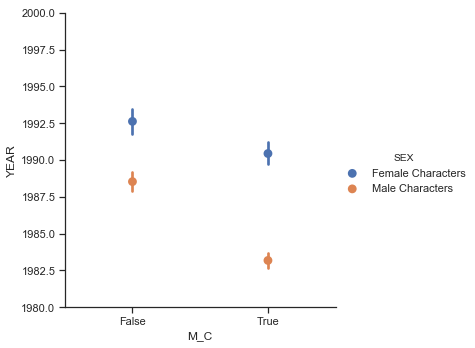

In [16]:
g4 = sns.factorplot(x = 'M_C', y = 'YEAR', hue = 'SEX', data = heroes, kind = 'point', ci = 99, join = False)
g4.set(ylim = (1980, 2000))
plt.show()

In [20]:
stocks = pd.read_csv('all-stocks.csv')
stocks

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
1,2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2,2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
3,2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
4,2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM
5,2006-01-10,79.00,79.01,78.08,78.53,1919900,MMM
6,2006-01-11,78.44,78.66,77.84,78.37,1911900,MMM
7,2006-01-12,78.20,78.23,77.20,77.70,2121100,MMM
8,2006-01-13,76.95,78.20,76.95,77.50,1925300,MMM
9,2006-01-17,77.10,77.62,77.00,77.09,2073400,MMM


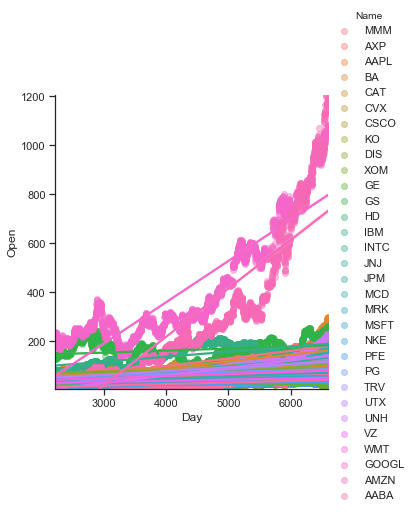

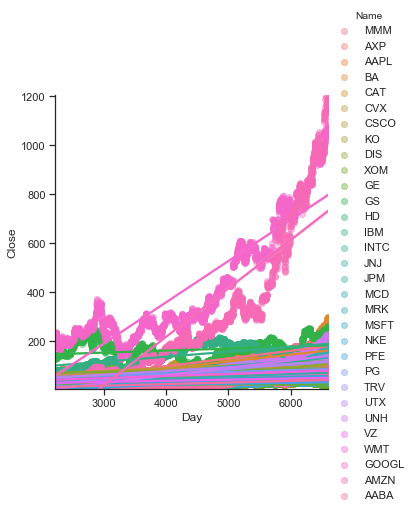

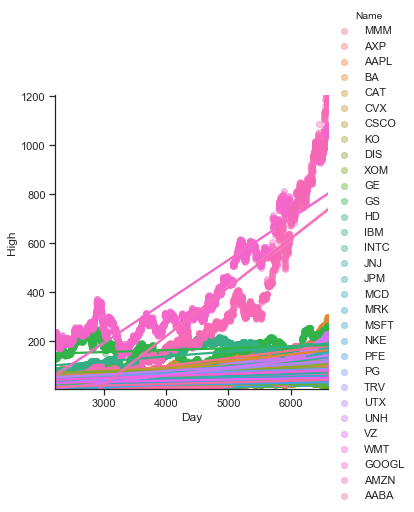

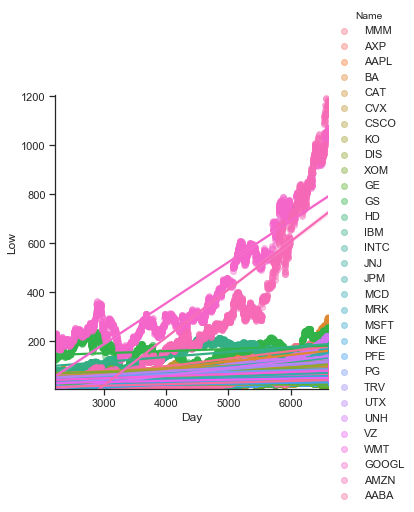

6.66
1195.83


In [46]:
def get_day(x):
    split_date = x.split('-')
    output = (float(split_date[0]) - 2000)*365
    month = float(split_date[1])
    if(month == 1 or month == 3 or month == 5 or month == 7 or month == 8 or month == 10 or month == 12):
        output = output + (month * 31)
    elif (month == 2):
        output = output + (month * 28)
    else:
        output = output + (month * 30)
    return output + float(split_date[2])
stocks['Day'] = stocks['Date'].apply(get_day)
master_plot1 = sns.lmplot(x = 'Day', y = 'Open', scatter_kws={'alpha':0.4}, data = stocks, hue = 'Name', fit_reg = True)
master_plot1.set(xlim = (2224, 6606), ylim = (5, 1205))
plt.show()
master_plot2 = sns.lmplot(x = 'Day', y = 'Close', scatter_kws={'alpha':0.4}, data = stocks, hue = 'Name', fit_reg = True)
master_plot2.set(xlim = (2224, 6606), ylim = (5, 1205))
plt.show()
master_plot3 = sns.lmplot(x = 'Day', y = 'High', scatter_kws={'alpha':0.4}, data = stocks, hue = 'Name', fit_reg = True)
master_plot3.set(xlim = (2224, 6606), ylim = (5, 1205))
plt.show()
master_plot4 = sns.lmplot(x = 'Day', y = 'Low', scatter_kws={'alpha':0.4}, data = stocks, hue = 'Name', fit_reg = True)
master_plot4.set(xlim = (2224, 6606), ylim = (5, 1205))
plt.show()

The histograms are able to show the pattern of the distribution, but they don't give the viewer as precise a view of the mean and confidence interval, especially for comparison between different sets. All of the others are the reverse. The scatterplots are able to show how the data is distributed along the two variables of interest while also making it easy to compare two different scatterplots. My final plot shows the interrelationship between the time and the value of the stocks according to four different measures while also allowing the different stocks to be visible.